# Similarity Modeling

In [1]:
#!python --version
#!conda list |grep -E "pandas|numpy|seaborn|librosa|opencv|scikit"

Python 3.8.5
libopencv                 4.4.0                    py38_2    conda-forge
librosa                   0.8.0              pyh9f0ad1d_0    conda-forge
numpy                     1.19.2           py38h456fd55_0  
numpy-base                1.19.2           py38hcfb5961_0  
opencv                    4.4.0                    py38_2    conda-forge
pandas                    1.1.3            py38hb1e8313_0  
py-opencv                 4.4.0            py38h23f93f0_2    conda-forge
scikit-image              0.17.2           py38hcf432d8_4    conda-forge
scikit-learn              0.23.2           py38h959d312_0  
seaborn                   0.11.0                     py_0  


In [1]:
import utils
import visual_feat_ext
import pandas as pd
import numpy as np

## Extract features from video

In [9]:
#import visual_feature_extraction
!python 'create_visual_feature_csv.py'

### Manually like this
#gt1 = pd.read_csv("../data/gt/gt_02_04_04.csv.csv", delimiter=",", na_values="")
#gt1.fillna(0, inplace=True)
#imgs, feats = visual_feat_ext.feats_from_avi(limit_frames=False, frames=4000, one_frame_per_sec=False,
#                                            blob_sigma=400, blob_t=0.04,
#                                            include_blobs=False, include_hists=True)
#df = pd.merge(feats, gt1, left_on=['minute','second'], right_on = ['Min','Sec']).drop(["Min","Sec"], axis=1)
#df.set_index(["minute","second","frame"], inplace=True)
#df.head(5)

feature file already exists... skipping
feature file already exists... skipping
feature file already exists... skipping


In [41]:
## Load data
x_train = pd.read_csv("../data/ep1_visual_hists.csv", delimiter=",", na_values="", dtype=int)
y_train = x_train["kermit_video"]
x_train = x_train.filter(regex=("_hist"))

x_test = pd.read_csv("../data/ep2_visual_hists.csv", delimiter=",", na_values="")
y_test = x_test["kermit_video"]
x_test = x_test.filter(regex=("_hist"))


/Users/ostritze/opt/anaconda3/envs/simmod/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (772) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Classify Hists only

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 

max_depth = [2, 8]
n_estimators = [100, 250, 500]
for d in max_depth:
    for n in n_estimators:
        rfor = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=42)
        rfor.fit(x_train, y_train)
        y_pred = rfor.predict(x_test)
        print("Estimators: ", n, " --- Depth: ",d)
        print("Accuracy:  ", round(accuracy_score(y_test,y_pred),4) )
        print("Precision: ", round(precision_score(y_test,y_pred),4) )
        print("Recall:    ", round(recall_score(y_test,y_pred),4) )
        print("F1:        ", round(f1_score(y_test,y_pred),4) )

Estimators:  100  --- Depth:  2
Accuracy:   0.6708
Precision:  0.2432
Recall:     0.0007
F1:         0.0014
Estimators:  250  --- Depth:  2
Accuracy:   0.6718
Precision:  1.0
Recall:     0.0017
F1:         0.0035
Estimators:  500  --- Depth:  2
Accuracy:   0.6716
Precision:  1.0
Recall:     0.0012
F1:         0.0024
Estimators:  100  --- Depth:  8
Accuracy:   0.7239
Precision:  0.9003
Recall:     0.1802
F1:         0.3003
Estimators:  250  --- Depth:  8
Accuracy:   0.7252
Precision:  0.9117
Recall:     0.1818
F1:         0.3032
Estimators:  500  --- Depth:  8
Accuracy:   0.7222
Precision:  0.9034
Recall:     0.1735
F1:         0.2911


In [81]:
# Try a MLP for comparison
from sklearn.neural_network import MLPClassifier

### need to scale first
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)

hidden_layer_sizes = [(100,), (100,3), (100,5), (256,3), (256, 5)]

for hlayer in hidden_layer_sizes:
    mlp = MLPClassifier(random_state=42, max_iter=300, hidden_layer_sizes=hlayer,
                        n_iter_no_change=25,
                        shuffle=False, verbose=False)
    mlp.fit(x_train_scaled, y_train)
    y_pred = mlp.predict(scaler.transform(x_test))
    print("Layers: ", hlayer)
    print("Accuracy:  ", round(accuracy_score(y_test,y_pred),4) )
    print("Precision: ", round(precision_score(y_test,y_pred),4) )
    print("Recall:    ", round(recall_score(y_test,y_pred),4) )
    print("F1:        ", round(f1_score(y_test,y_pred),4) )

Layers:  (100,)
Accuracy:   0.6291
Precision:  0.4269
Recall:     0.3749
F1:         0.3992
Layers:  (100, 3)
Accuracy:   0.6676
Precision:  0.4909
Recall:     0.302
F1:         0.374
Layers:  (100, 5)
Accuracy:   0.6573
Precision:  0.471
Recall:     0.3443
F1:         0.3978
Layers:  (256, 3)
Accuracy:   0.6712
Precision:  0.0
Recall:     0.0
F1:         0.0


/Users/ostritze/opt/anaconda3/envs/simmod/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ostritze/opt/anaconda3/envs/simmod/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Layers:  (256, 5)
Accuracy:   0.6984
Precision:  0.5782
Recall:     0.3049
F1:         0.3993


Layers:  (100,)
Accuracy:   0.6291
Precision:  0.4269
Layers:  (100, 3)
Accuracy:   0.6676
Precision:  0.4909
Layers:  (100, 5)
Accuracy:   0.6573
Precision:  0.471
Layers:  (256, 3)
Accuracy:   0.6712
Precision:  0.0
Layers:  (256, 5)
Accuracy:   0.6984
Precision:  0.5782

### Validate

In [74]:
x_val = pd.read_csv("../data/ep3_visual_hists.csv", delimiter=",", na_values="")
y_val = x_val["kermit_video"]
x_val = x_val.filter(regex=("_hist"))

In [84]:
# best performer above...
rfor = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)
rfor.fit(x_train, y_train)
y_pred = rfor.predict(x_val)
print("Accuracy:  ", round(accuracy_score(y_val,y_pred),4) )
print("Precision: ", round(precision_score(y_val,y_pred),4) )
print("Recall:    ", round(recall_score(y_val,y_pred),4) )
print("F1:        ", round(f1_score(y_val,y_pred),4) )

Accuracy:   0.5286
Precision:  0.3441
Recall:     0.0137
F1:         0.0263


## Try on blobs

In [133]:
x_train = pd.read_csv("../data/ep1_visual_full.csv", delimiter=",", na_values="").fillna(0)
y_train = x_train["kermit_video"]
#x_train = x_train.filter(regex=("_blob|_hist"))
x_train = x_train.filter(regex=("_blob"))

x_test = pd.read_csv("../data/ep2_visual_full.csv", delimiter=",", na_values="").fillna(0)
y_test = x_test["kermit_video"]
#x_test = x_test.filter(regex=("_blob|_hist"))
x_test = x_test.filter(regex=("_blob"))

x_val = pd.read_csv("../data/ep3_visual_full.csv", delimiter=",", na_values="").fillna(0)
y_val = x_val["kermit_video"]
#x_test = x_test.filter(regex=("_blob|_hist"))
x_val = x_val.filter(regex=("_blob"))

# bring to same shape
cols = list(x_val.iloc[:,(x_train.shape[1]-x_val.shape[1]):].columns)
for col in cols:
    x_train[col] = 0

cols = list(x_val.iloc[:,(x_test.shape[1]-x_val.shape[1]):].columns)
for col in cols:
    x_test[col] = 0

if x_val.shape[1] == x_test.shape[1] == x_train.shape[1]:
    print("all set!")


all set!


In [134]:
#from sklearn.metrics import accuracy_score, precision_score
from tpot import TPOTClassifier
pipe = TPOTClassifier(
    generations=5,
    population_size=15,
    cv=4,
    random_state=42,
    verbosity=2
)
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
print(pipe.score(x_test, y_test))
print("Accuracy:  ", round(accuracy_score(y_test,y_pred),4) )
print("Precision: ", round(precision_score(y_test,y_pred),4) )
print("Recall:    ", round(recall_score(y_test,y_pred),4) )
print("F1:        ", round(f1_score(y_test,y_pred),4) )
pipe.export("blobs_tpot.py")


Generation 1 - Current best internal CV score: 0.8558018396774032

Generation 2 - Current best internal CV score: 0.8558018396774032

Generation 3 - Current best internal CV score: 0.8558018396774032

Generation 4 - Current best internal CV score: 0.8677441710240009

Generation 5 - Current best internal CV score: 0.8677441710240009

Best pipeline: MLPClassifier(MLPClassifier(LogisticRegression(input_matrix, C=15.0, dual=False, penalty=l2), alpha=0.0001, learning_rate_init=0.001), alpha=0.0001, learning_rate_init=0.01)
0.8095693285452243
Accuracy:   0.8096
Precision:  0.8417
Recall:     0.5182
F1:         0.6415


In [135]:
y_pred = pipe.predict(x_val)
print(pipe.score(x_val, y_val))
print("Accuracy:  ", round(accuracy_score(y_val,y_pred),4) )
print("Precision: ", round(precision_score(y_val,y_pred),4) )
print("Recall:    ", round(recall_score(y_val,y_pred),4) )
print("F1:        ", round(f1_score(y_val,y_pred),4) )

0.5802748123327879
Accuracy:   0.5803
Precision:  0.721
Recall:     0.1607
F1:         0.2629


## Combine feats

In [1]:
import pandas as pd

x_train = pd.read_csv("../data/ep1_visual_full.csv", delimiter=",", na_values="").fillna(0)
y_train = x_train["kermit_video"]
x_train = x_train.filter(regex=("_hist|_blob"))

x_test = pd.read_csv("../data/ep2_visual_full.csv", delimiter=",", na_values="").fillna(0)
y_test = x_test["kermit_video"]
x_test = x_test.filter(regex=("_hist|_blob"))

x_val = pd.read_csv("../data/ep3_visual_full.csv", delimiter=",", na_values="").fillna(0)
y_val = x_val["kermit_video"]
x_val = x_val.filter(regex=("_hist|_blob"))

# bring to same shape
cols = list(x_val.iloc[:,(x_train.shape[1]-x_val.shape[1]):].columns)
for col in cols:
    x_train[col] = 0

cols = list(x_val.iloc[:,(x_test.shape[1]-x_val.shape[1]):].columns)
for col in cols:
    x_test[col] = 0

if x_val.shape[1] == x_test.shape[1] == x_train.shape[1]:
    print("all set!")

/Users/ostritze/opt/anaconda3/envs/simmod/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (787) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


all set!


In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
import tpot
pipe = tpot.TPOTClassifier(
    generations=3,
    population_size=10,
    cv=2,
    random_state=42,
    verbosity=2
)
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
print(pipe.score(x_test, y_test))
print("Accuracy:  ", round(accuracy_score(y_test,y_pred),4) )
print("Precision: ", round(precision_score(y_test,y_pred),4) )
print("Recall:    ", round(recall_score(y_test,y_pred),4) )
print("F1:        ", round(f1_score(y_test,y_pred),4) )
pipe.export("visual_tpot.py")


Generation 1 - Current best internal CV score: 0.9080709373868983

Generation 2 - Current best internal CV score: 0.9080709373868983

Generation 3 - Current best internal CV score: 0.9080709373868983

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=True, criterion=gini, max_features=0.25, min_samples_leaf=8, min_samples_split=11, n_estimators=100)
0.7630919471930142
Accuracy:   0.7631
Precision:  0.9209
Recall:     0.3056
F1:         0.4589


In [4]:
y_pred = pipe.predict(x_val)
print(pipe.score(x_val, y_val))
print("Accuracy:  ", round(accuracy_score(y_val,y_pred),4) )
print("Precision: ", round(precision_score(y_val,y_pred),4) )
print("Recall:    ", round(recall_score(y_val,y_pred),4) )
print("F1:        ", round(f1_score(y_val,y_pred),4) )

0.567001740304943
Accuracy:   0.567
Precision:  0.8145
Recall:     0.0907
F1:         0.1632


## Try a CV approach

In [1]:
import pandas as pd

x_train = pd.read_csv("../data/ep1_visual_full.csv", delimiter=",", na_values="").fillna(0)
x_test = pd.read_csv("../data/ep2_visual_full.csv", delimiter=",", na_values="").fillna(0)
x_val = pd.read_csv("../data/ep3_visual_full.csv", delimiter=",", na_values="").fillna(0)

x = pd.concat([x_train, x_test, x_val]).fillna(0)

from sklearn.model_selection import train_test_split
x_train, x_val= train_test_split(
    x, test_size=0.20, random_state=42, stratify=x["kermit_video"])

y_train = x_train["kermit_video"]
x_train = x_train.filter(regex=("_hist|_blob"))

y_val = x_val["kermit_video"]
x_val = x_val.filter(regex=("_hist|_blob"))


/Users/ostritze/opt/anaconda3/envs/simmod-2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (787) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Accuracy:   0.9902
Precision:  0.9904
Recall:     0.9784
F1:         0.9844


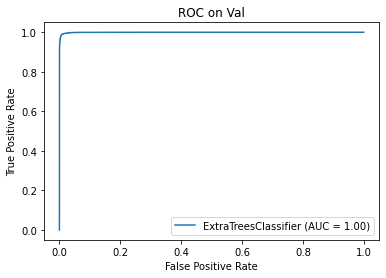

In [4]:
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_roc_curve

# use tpot classifier from above
pipe = ExtraTreesClassifier(bootstrap=True, criterion="gini", max_features=0.25, min_samples_leaf=8, min_samples_split=11, n_estimators=100)
if hasattr(pipe, 'random_state'):
    setattr(pipe, 'random_state', 42)
pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_val)

print("Accuracy:  ", round(accuracy_score(y_val,y_pred),4) )
print("Precision: ", round(precision_score(y_val,y_pred),4) )
print("Recall:    ", round(recall_score(y_val,y_pred),4) )
print("F1:        ", round(f1_score(y_val,y_pred),4) )

plot_roc_curve(pipe, x_val, y_val)
plt.title("ROC on Val")
plt.show()

Well, this looks promising

In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
import tpot
pipe = tpot.TPOTClassifier(
    generations=3,
    population_size=4,
    cv=2,
    scoring="roc_auc",
    random_state=42,
    verbosity=2
)
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_train)
print(pipe.score(x_train, y_train))
print("Accuracy:  ", round(accuracy_score(y_train,y_pred),4) )
print("Precision: ", round(precision_score(y_train,y_pred),4) )
print("Recall:    ", round(recall_score(y_train,y_pred),4) )
print("F1:        ", round(f1_score(y_train,y_pred),4) )
pipe.export("visual_tpot_cv.py")

Optimization Progress:   0%|          | 0/16 [00:00<?, ?pipeline/s]



TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: GaussianNB(input_matrix)
0.6648396354884811
Accuracy:   0.5586
Precision:  0.4054
Recall:     0.8665
F1:         0.5524
